In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 6
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((521, 12, 1), (521,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT6/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/53 [=======================>......] - ETA: 0s - loss: 0.2428 - root_mean_squared_error: 0.4927

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 7s 83ms/step - loss: 0.2368 - root_mean_squared_error: 0.4866 - val_loss: 0.2385 - val_root_mean_squared_error: 0.4884
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.1765 - root_mean_squared_error: 0.4201

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.1760 - root_mean_squared_error: 0.4195 - val_loss: 0.1986 - val_root_mean_squared_error: 0.4456
Epoch 3/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1456 - root_mean_squared_error: 0.3816

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.1447 - root_mean_squared_error: 0.3804 - val_loss: 0.1705 - val_root_mean_squared_error: 0.4129
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.1162 - root_mean_squared_error: 0.3409

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.1162 - root_mean_squared_error: 0.3409 - val_loss: 0.1458 - val_root_mean_squared_error: 0.3819
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.0962 - root_mean_squared_error: 0.3102

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0962 - root_mean_squared_error: 0.3102 - val_loss: 0.1205 - val_root_mean_squared_error: 0.3472
Epoch 6/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2664

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0706 - root_mean_squared_error: 0.2657 - val_loss: 0.0963 - val_root_mean_squared_error: 0.3103
Epoch 7/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0583 - root_mean_squared_error: 0.2415

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0576 - root_mean_squared_error: 0.2399 - val_loss: 0.0746 - val_root_mean_squared_error: 0.2731
Epoch 8/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0504 - root_mean_squared_error: 0.2245

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2436
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0349 - root_mean_squared_error: 0.1869

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0348 - root_mean_squared_error: 0.1865 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2094
Epoch 10/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1648

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1797
Epoch 11/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0215 - root_mean_squared_error: 0.1466

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0216 - root_mean_squared_error: 0.1468 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1357

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 13/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.1235

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1283

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0165 - root_mean_squared_error: 0.1284 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 15/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1191

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 16/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0135 - root_mean_squared_error: 0.1162

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0134 - root_mean_squared_error: 0.1156 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0652
Epoch 17/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1090

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 18/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1120

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0760
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0946
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - val_loss: 0.0038 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


INFO:tensorflow:Assets written to: Pacific_model_LT6\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 26/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0608
Epoch 27/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0100 - root_mean_squared_error: 0.1002 - val_loss: 0.0042 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.3842079480489096 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

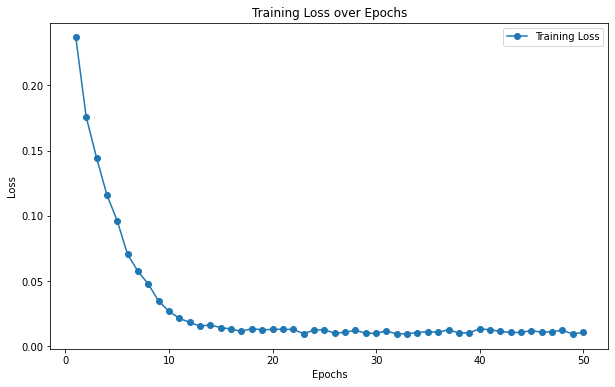

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

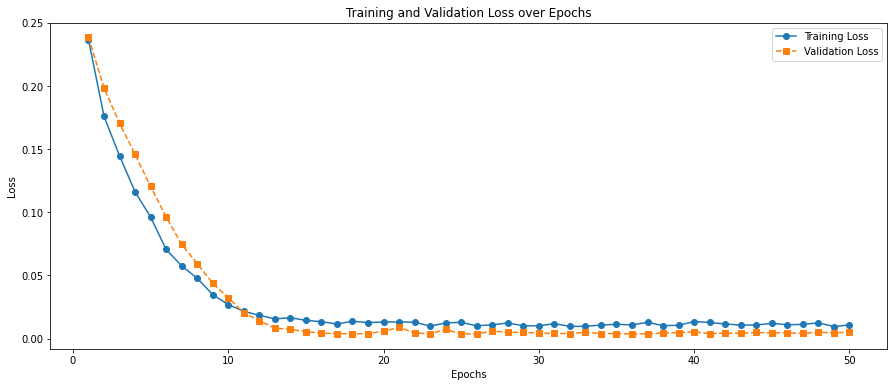

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT6/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07535406665873365
MAE : 0.06080577866234436


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.784622e+06,1960480.542
1,1.324008e+06,1264318.504
2,9.208142e+05,863206.294
3,4.700893e+05,635624.004
4,3.874234e+05,460009.672
5,4.347092e+05,610848.036
6,7.601392e+05,819257.445
7,1.107942e+06,1129627.707
8,1.319960e+06,1463383.236
9,1.566992e+06,1614536.727


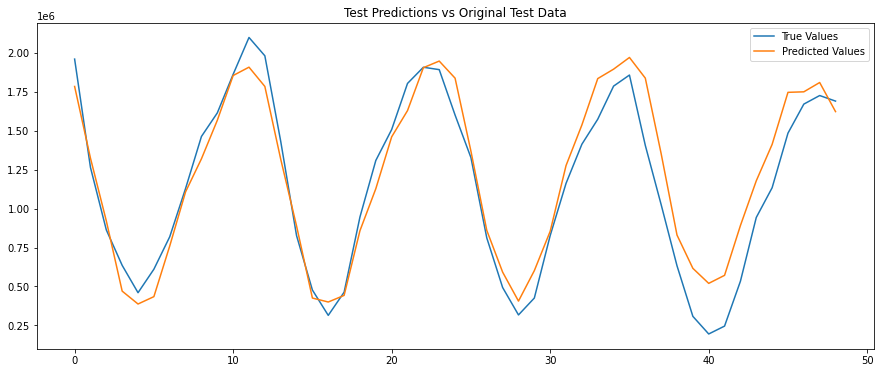

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

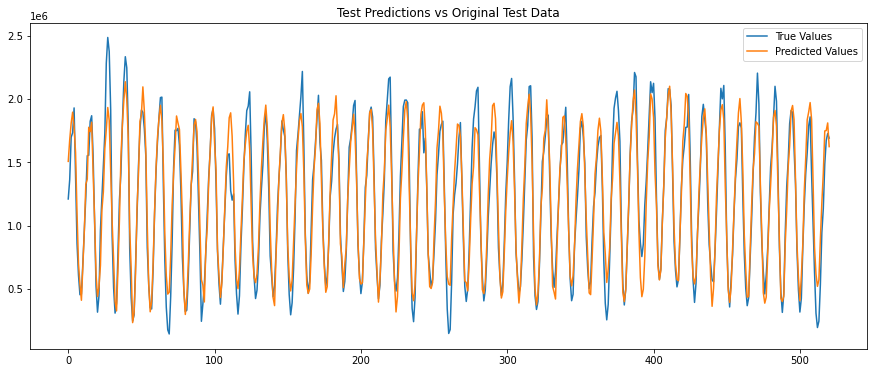

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()